# Exploratory Data Analysis on YouTube Top Trending Videos

Hey y'all I vlog with my girlfriend on YouTube and thought it would be interesting to do some EDA on some YouTube trending videos.

This is a dataset from Kaggle on trending YouTube videos form 2017-2018


## Summary of the dataset
YouTube maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Data is included for the US, GB, DE, CA, and FR regions (USA, Great Britain, Germany, Canada, and France, respectively), with up to 200 listed trending videos per day. You can find the data here https://www.kaggle.com/datasnaek/youtube-new

## Import Libraries
First lets import some of the libraries that we will be using

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import wordcloud
import datetime

## Read in data
I will be mainly focusing on US data set. Let get some basic description of data.

In [2]:
yt_df = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/USvideos.csv')

yt_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
yt_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Now we have a basic idea of the data and its columns. Also we have a summary of some of the continuous variables.

## Scatter Plots
Creating some visualizations of views, likes, and dislikes to see if there is any correlations.

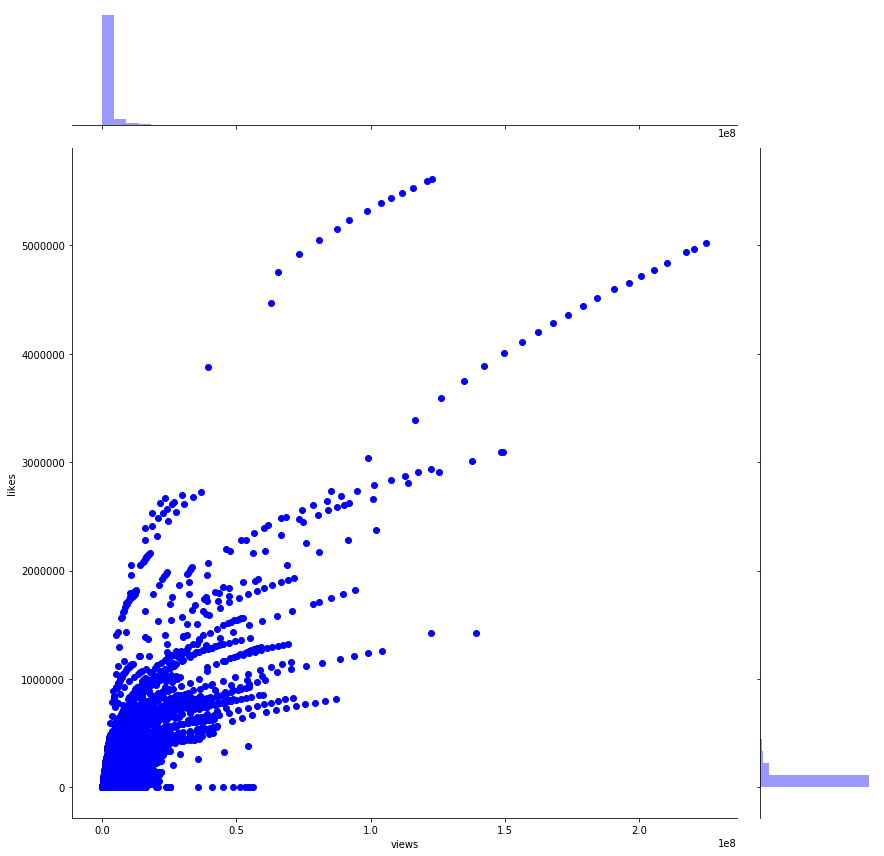

In [4]:

sns.jointplot(x='views',y='likes',data=yt_df,color='blue', height=12)

The first scatter plot we have the views to likes. Since it is a jointplot we can also see the distribution and see that most trending views and likes are towards the lower range with huge outliers.  It loosely follows a $likes$ = $\sqrt{views}$

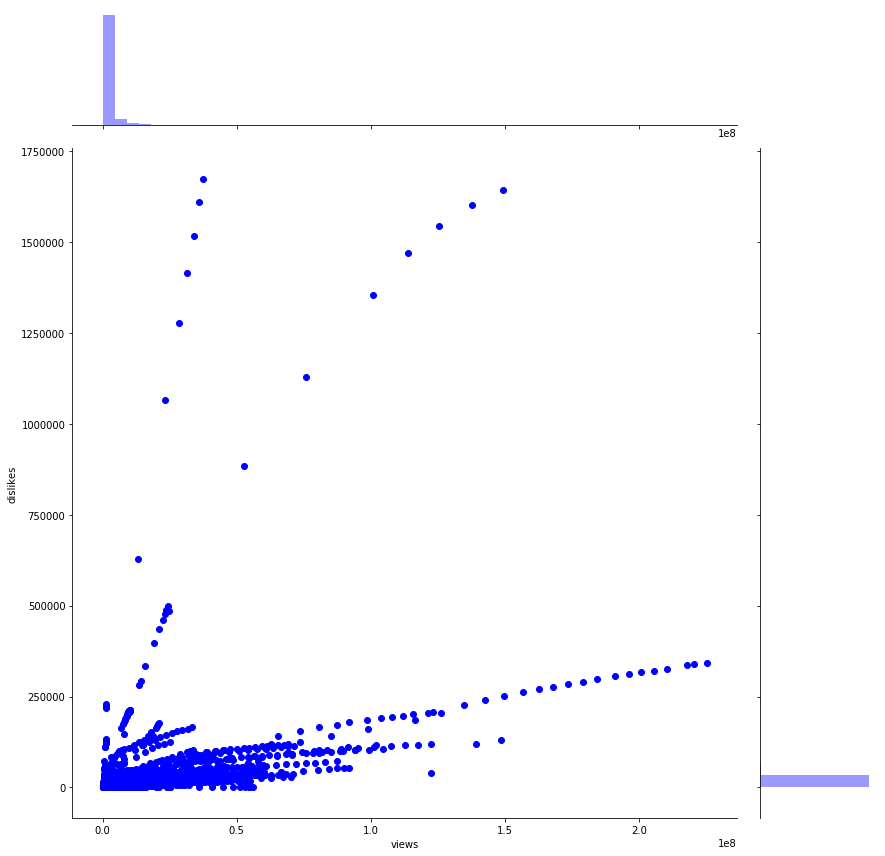

In [5]:
sns.jointplot(x='views',y='dislikes',data=yt_df,color='blue',height=12)

Here is a scatterplot of dislikes to views the relationship is not as distinct as with likes, but still the more dislikes a video has the more views it will likely have

## Correlation and Heatmap
Let’s create a correlation data frame of the quantifiable variables after that the correlation is visualized with a heatmap

In [6]:
correlation = ['views', 'likes', 'dislikes', 'comment_count']

In [7]:
corr_data = yt_df[correlation].corr() 
display(corr_data)

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


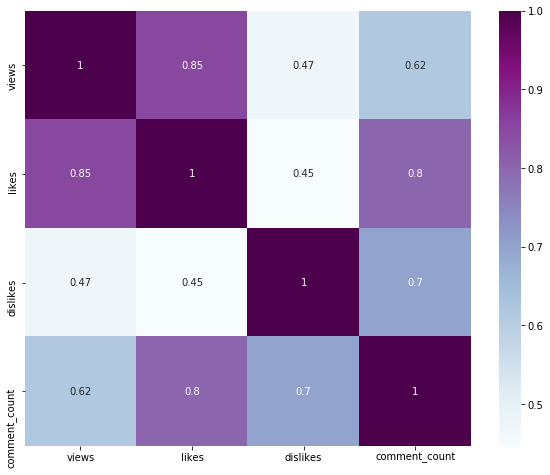

In [8]:
plt.figure(figsize = (10,8))

sns.heatmap(corr_data, cmap='BuPu', annot=True)

There is strong correlation between views and likes more than any other variable. The next strong correlations are between comment counts and likes and dislikes, even more of correlation that views! A viewer who interacts with the video and comments is much more likely to dislike or like the video.

## Count of most popular Categories
Now let us look at the most popular video categories. First the category_id column needs to be changed to the names from the accompanying JSON file

In [9]:
#yt_df['category_name'] = np.nan

#yt_df.loc[(yt_df["category_id"] == 1),"category_name"] = 'Film and Animation'
#yt_df.loc[(yt_df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
#yt_df.loc[(yt_df["category_id"] == 10),"category_name"] = 'Music'
#yt_df.loc[(yt_df["category_id"] == 15),"category_name"] = 'Pets and Animals'
#yt_df.loc[(yt_df["category_id"] == 17),"category_name"] = 'Sport'
#yt_df.loc[(yt_df["category_id"] == 19),"category_name"] = 'Travel and Events'
#yt_df.loc[(yt_df["category_id"] == 20),"category_name"] = 'Gaming'
#yt_df.loc[(yt_df["category_id"] == 22),"category_name"] = 'People and Blogs'
#yt_df.loc[(yt_df["category_id"] == 23),"category_name"] = 'Comedy'
#yt_df.loc[(yt_df["category_id"] == 24),"category_name"] = 'Entertainment'
#yt_df.loc[(yt_df["category_id"] == 25),"category_name"] = 'News and Politics'
#yt_df.loc[(yt_df["category_id"] == 26),"category_name"] = 'How to and Style'
#yt_df.loc[(yt_df["category_id"] == 27),"category_name"] = 'Education'
#yt_df.loc[(yt_df["category_id"] == 28),"category_name"] = 'Science and Technology'
#yt_df.loc[(yt_df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'

In [10]:
with open("C:/Users/blong/Desktop/Python/youtube-new/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_nm = {}
for cat in categories:
    cat_nm[int(cat["id"])] = cat["snippet"]["title"]
yt_df['category_name'] = yt_df['category_id'].map(cat_nm)

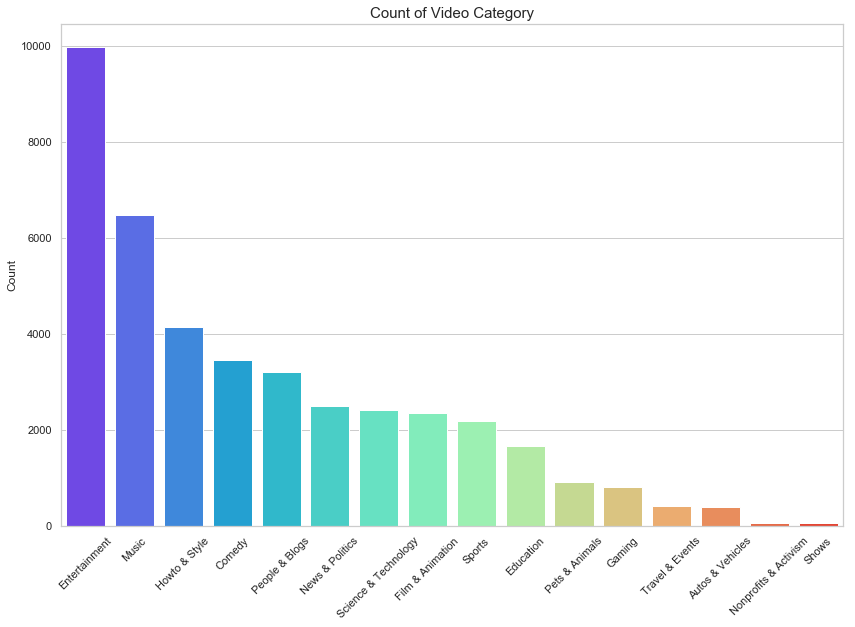

In [11]:
plt.figure(figsize = (14,9))

sns.set(style='whitegrid')
g = sns.countplot('category_name',order=yt_df['category_name'].value_counts().index, data=yt_df, palette="rainbow")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Count of Video Category", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)


Entertainment, Music, and How to are some of the most popular trending videos categories.

## Title Length and views
Checking the length of the titles and some trends around those. First a new column is made for title length.

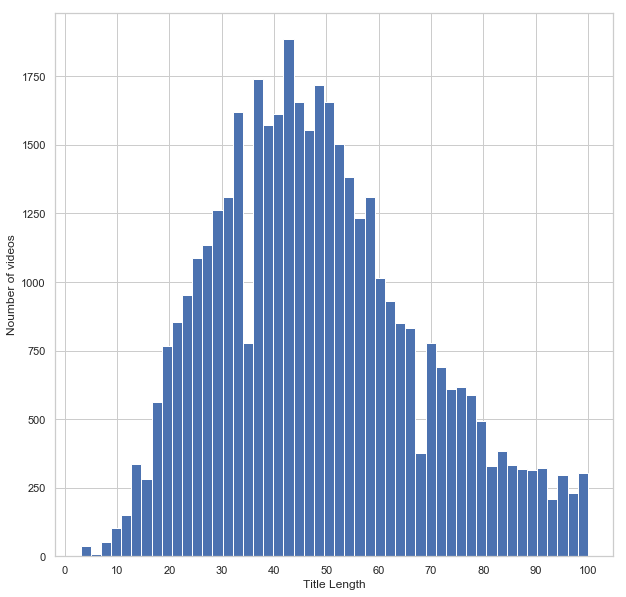

In [12]:
yt_df["title_length"] = yt_df["title"].apply(lambda x: len(x))

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10,10))
g3 = sns.distplot(yt_df["title_length"], kde=False, rug=False, 
                 hist_kws={'alpha': 1}, ax=ax)
g3 = ax.set(xlabel="Title Length", ylabel="Noumber of videos", xticks=range(0, 110, 10))

The most common title lengths are around 30-55 according to the histogram.

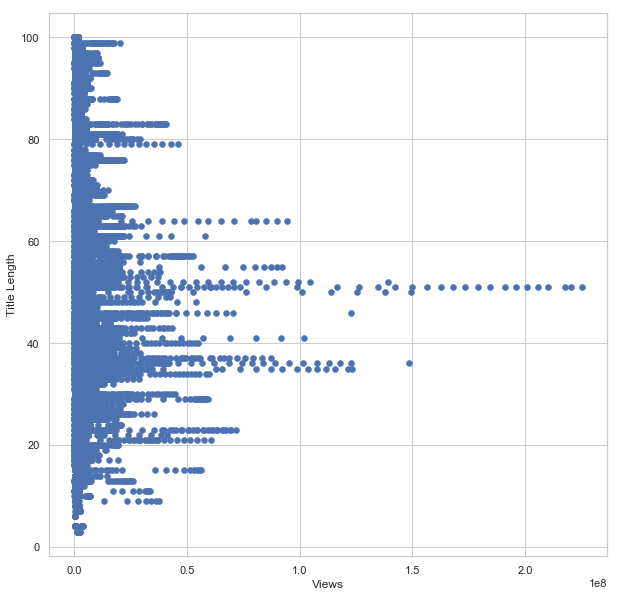

In [13]:

fig, ax = plt.subplots(figsize=(10,10))
g4 = ax.scatter(x=yt_df['views'], y=yt_df['title_length'], linewidths=0.5)
g4 = ax.set(xlabel="Views", ylabel="Title Length")

The most viewed videos have title lengths from around 35-65. Interestingly enough the most viewed videos all have title length around 50.

## New Rates variables
Created new variables to check the engangment rates

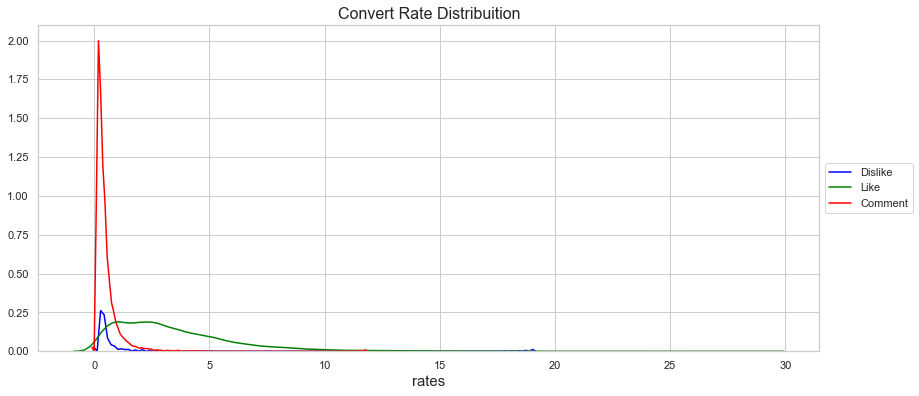

In [14]:
yt_df['like_rate'] =  yt_df['likes'] / yt_df['views'] *100
yt_df['dislike_rate'] =  yt_df['dislikes'] / yt_df['views'] *100
yt_df['comment_rate'] =  yt_df['comment_count'] / yt_df['views'] *100

plt.figure(figsize = (14,6))

g1 = sns.distplot(yt_df['dislike_rate'], color='blue',hist=False, label="Dislike")
g1 = sns.distplot(yt_df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(yt_df['comment_rate'],color='red' ,hist=False,label="Comment")
g1.set_title('Convert Rate Distribuition', fontsize=16)
plt.xlabel('rates', fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Very intriguing to see how different each distribution rate is, with likes having a high rate and comments having the largest engagement.

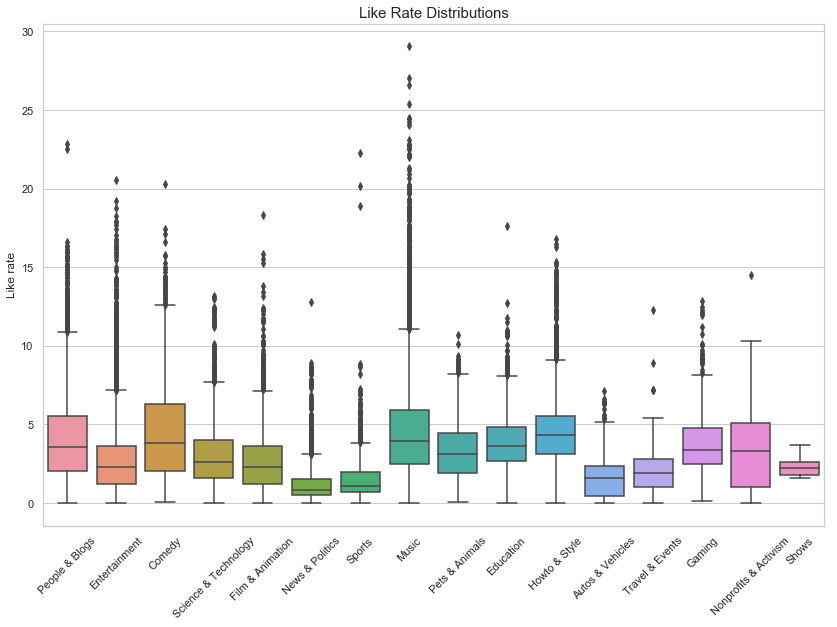

In [15]:
plt.figure(figsize = (14,9))

g= sns.boxplot(x='category_name',y='like_rate',  data=yt_df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Like Rate Distributions", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)
plt.subplots_adjust(hspace = 0.9, top = 0.9)

Taking a closer look at each category by like rate, Music is one of the most liked categories.  

## New Heatmap
Using these new variables let us see if there is any different in the correlations. 

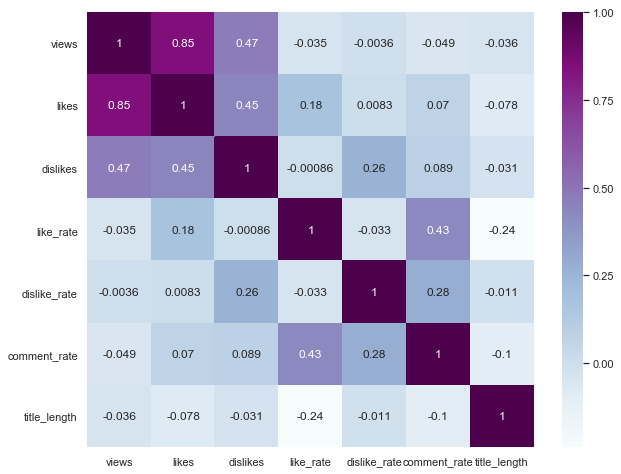

In [16]:
new_corr_df = yt_df[['views','likes','dislikes', "category_name"
                     ,'like_rate', 'dislike_rate', 'comment_rate','title_length',]].corr()

plt.figure(figsize = (10,8))

sns.heatmap(new_corr_df,cmap='BuPu' ,annot=True)
plt.show()

Likes still correlates most to views. The rates and title lengths do not seem to have much correlation. Though there is small one between the like and comment rate.

## World Cloud
Creating a Word Cloud of the most common words in each title is a fun way to see the most common words. Official, Video, New, Trailer, and Makeup are some of most common words.

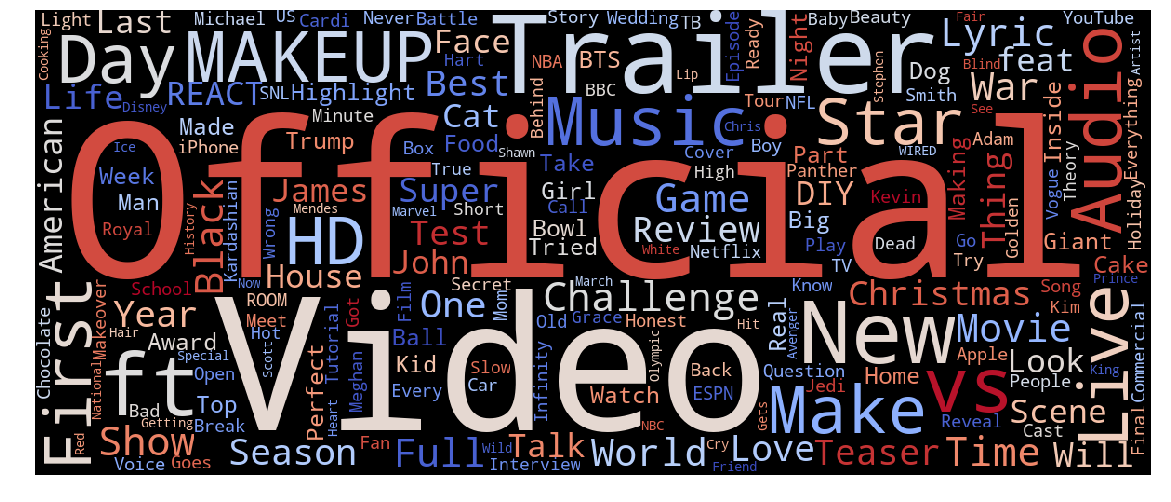

In [17]:
tle_wrd = list(yt_df["title"].apply(lambda x: x.split()))
tle_wrd = [x for y in tle_wrd for x in y]


wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="Black", 
                         colormap="coolwarm").generate(" ".join(tle_wrd))
plt.figure(figsize=(20,15))
plt.imshow(wc)
ax = plt.axis("off")

## Most popular channels

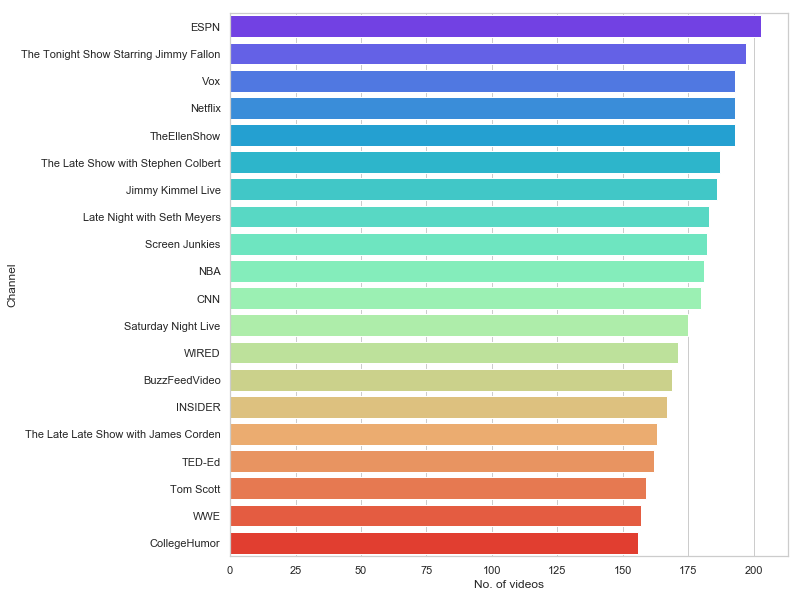

In [18]:
cdf = yt_df.groupby("channel_title").size().reset_index(name="video_count").sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(10,10))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette='rainbow', ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

The most popular channels are already established brands which makes sense.

# Time and Day of Week

The publish_time column in the dataset is 2017-11-12T18:01:41.000Z. The information according to tis website https://www.w3.org/TR/NOTE-datetime the date of publishing the video is 2017-11-12 and the time is 18:01:41 in Coordinated Universal Time (UTC) time zone.


In [19]:
yt_df["publishing_day"] = yt_df["publish_time"].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))

yt_df["publishing_hour"] = yt_df["publish_time"].apply(lambda x: x[11:13])

yt_df.drop(labels='publish_time', axis=1, inplace=True)

## Day of Week counts

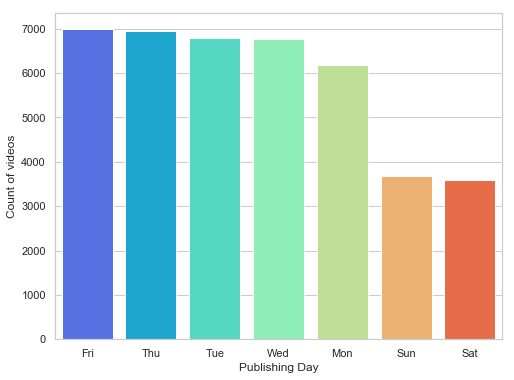

In [20]:
count_day_df = yt_df["publishing_day"].value_counts().to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})

fig, ax = plt.subplots(figsize=(8,6))
g5 = sns.barplot(x="publishing_day", y="No_of_videos", data=count_day_df, palette='rainbow', ax=ax)
g5 = ax.set(xlabel="Publishing Day", ylabel="Count of videos")

The most popular day of the week is friday with a lull on the weekends.

## Hour of day counts

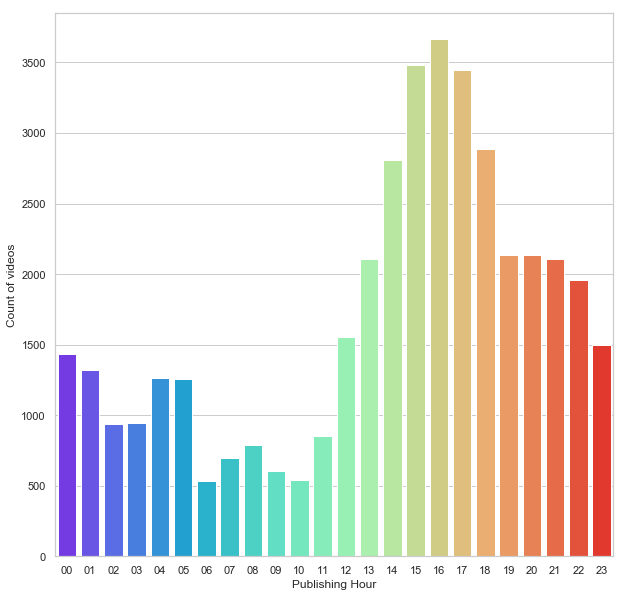

In [21]:
count_hour_df = yt_df["publishing_hour"].value_counts().to_frame().reset_index().rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})

fig, ax = plt.subplots(figsize=(10,10))

g6 = sns.barplot(x="publishing_hour", y="No_of_videos", data=count_hour_df, palette='rainbow', ax=ax)
g6 = ax.set(xlabel="Publishing Hour", ylabel="Count of videos")

The most popular time of day seems to be between 2PM to 6PM.

## Comparing other countires
Most of this time I have looking at US video trends. Read in all the other countires like UK, Canada, etc.

In [22]:
col_list = [ 'views', 'likes', 'dislikes', 'comment_count']

us = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/USvideos.csv', usecols=col_list) #USA
ca = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/CAvideos.csv', usecols=col_list) #Canada
de = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/DEvideos.csv', usecols=col_list) #Germany
fr = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/FRvideos.csv', usecols=col_list) #France
gb = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/GBvideos.csv', usecols=col_list) #United Kingdom 
ind = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/INvideos.csv', usecols=col_list) #India
jp = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/JPvideos.csv', usecols=col_list) #Japan
kr = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/KRvideos.csv', usecols=col_list) #South Korea
mx = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/MXvideos.csv', usecols=col_list) #Mexico
ru = pd.read_csv('C:/Users/blong/Desktop/Python/youtube-new/RUvideos.csv', usecols=col_list) #Russia

## Scatterplot of each country by likes and views

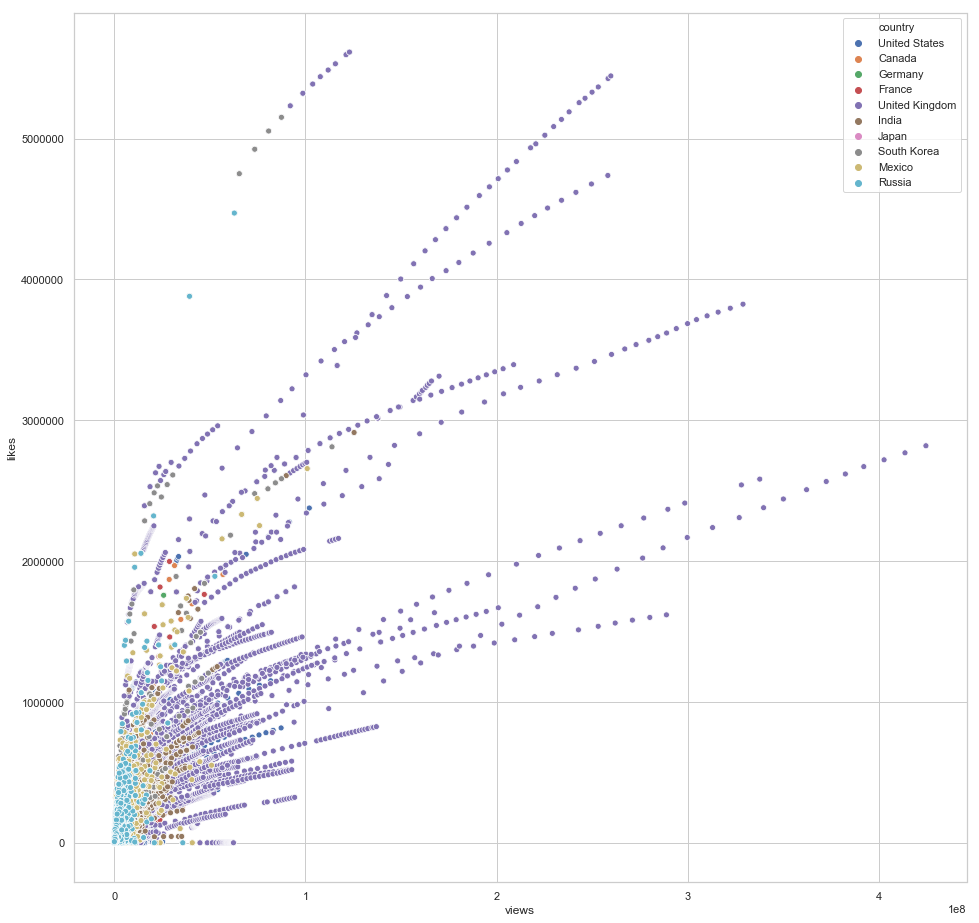

In [23]:

yt_df_list = [us, ca, de, fr, gb, ind, jp, kr, mx, ru]
yt_df_name_list = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'India','Japan', 'South Korea', 'Mexico', 'Russia']

All_yt_df = pd.DataFrame(columns=['views', 'likes', 'country'])

for i in range (len(yt_df_list)):
    combine = np.full((len(yt_df_list[i])),yt_df_name_list[i])
    yt_df_list[i]['country'] = combine
    All_yt_df = pd.merge(All_yt_df,yt_df_list[i], how='outer')
    
matplotlib.pyplot.figure(figsize=(16,16))
sns.scatterplot(x=All_yt_df["views"], y=All_yt_df["likes"], hue=All_yt_df["country"])
    

The trend is similar for the USA as it is for most countries. One hypothesis for this is the less viewed videos are watched by subscribers or binge watchers, who have a generally like and comment. More viewed videos are shown to people less active on YouTube, who have a lower tendency to give a like. In theory the like/view ratio will mostly likely fall as the views on the videos increase.

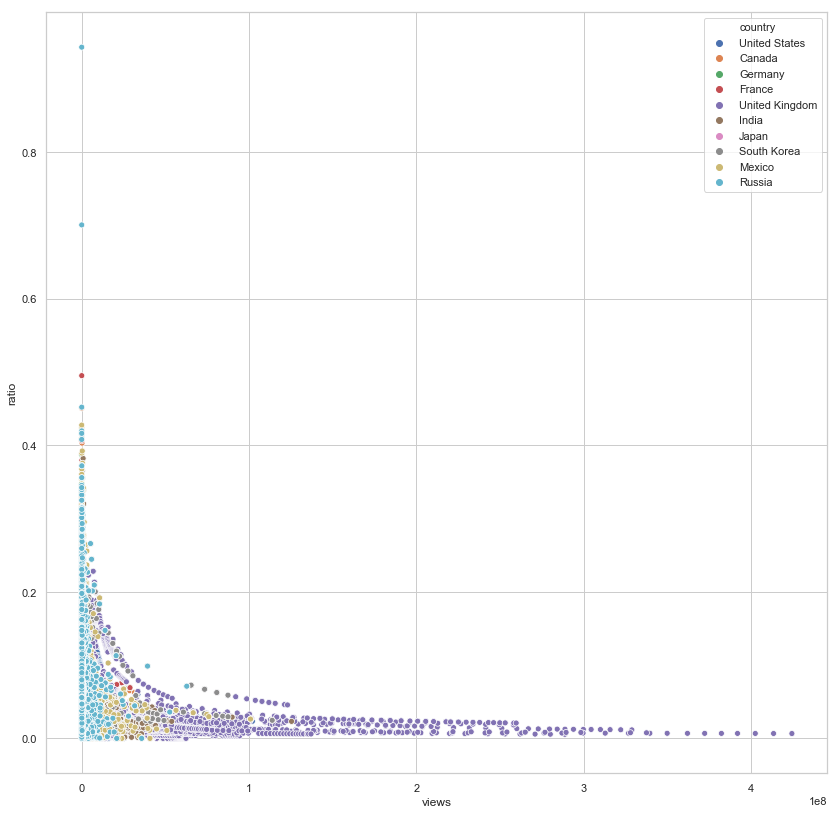

In [24]:
views = All_yt_df["views"]
likes = All_yt_df["likes"]
ratio = likes/views
All_yt_df["ratio"] = ratio
matplotlib.pyplot.figure(figsize=(14,14))
sns.scatterplot(x=All_yt_df["views"], y=All_yt_df["ratio"], hue=All_yt_df["country"])

The above hypothesis seems to stand correct the ratio of likes is much higher on lower viewed videos.

Thanks for reading through my EDA on trending YouTube videos I hope you found it interesting use the contact on my website if you have any questions or ideas on other datasets you would like me to check out!